<a href="https://colab.research.google.com/github/Balaramansethu/Arithmetic-operation-TDD/blob/main/Another_copy_of_Epilepsy_Seizure_Determination_Combining_Brain_Heart_Signal_Analysis_And_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving combined_dataset.csv to combined_dataset.csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('combined_dataset.csv')

# Load the combined EEG and ECG data with labels
X_eeg = data.iloc[:, 1:179].values
X_ecg = data['ECG'].values
y = data['y'].values - 1

# Standardize EEG and ECG data
scaler_eeg = StandardScaler()
X_eeg = scaler_eeg.fit_transform(X_eeg)

scaler_ecg = StandardScaler()
X_ecg = scaler_ecg.fit_transform(X_ecg.reshape(-1, 1))

# Combine standardized EEG and ECG data
X_combined = np.concatenate((X_eeg, X_ecg.reshape(-1, 1)), axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.33, random_state=42,
)
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X171,X172,X173,X174,X175,X176,X177,X178,y,ECG
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000,6.186348
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275,1156.926988
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000,-2000.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000,-989.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000,10.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000,1002.250000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000,1999.000000


In [ ]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X171,X172,X173,X174,X175,X176,X177,X178,y,ECG
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-15,-31,-77,-103,-127,-116,-83,-51,4,1121
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,150,146,152,157,156,154,143,129,1,1923
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,64,48,19,-12,-30,-35,-35,-36,5,811
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-81,-80,-77,-85,-77,-72,-69,-65,5,1559
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,2,-12,-32,-41,-65,-83,-89,-73,5,-639


In [ ]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 181 columns):
 #    Column   Non-Null Count  Dtype 
---   ------   --------------  ----- 
 0    Unnamed  11500 non-null  object
 1    X1       11500 non-null  int64 
 2    X2       11500 non-null  int64 
 3    X3       11500 non-null  int64 
 4    X4       11500 non-null  int64 
 5    X5       11500 non-null  int64 
 6    X6       11500 non-null  int64 
 7    X7       11500 non-null  int64 
 8    X8       11500 non-null  int64 
 9    X9       11500 non-null  int64 
 10   X10      11500 non-null  int64 
 11   X11      11500 non-null  int64 
 12   X12      11500 non-null  int64 
 13   X13      11500 non-null  int64 
 14   X14      11500 non-null  int64 
 15   X15      11500 non-null  int64 
 16   X16      11500 non-null  int64 
 17   X17      11500 non-null  int64 
 18   X18      11500 non-null  int64 
 19   X19      11500 non-null  int64 
 20   X20      11500 non-null  int64 
 21   X21      1

The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


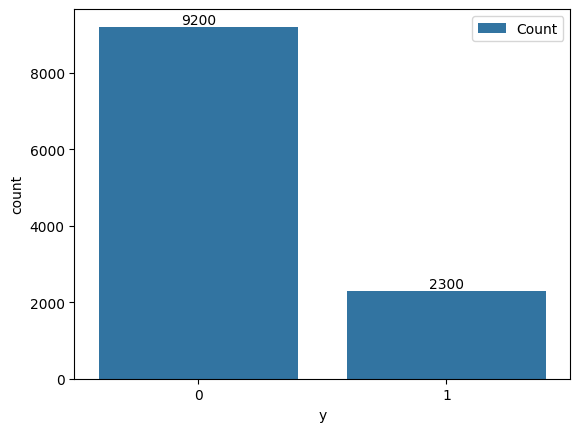

In [ ]:
def convert_label(x):
    if (x > 1):
        return 0
    else:
        return x

# apply convert function
data["y"] = data['y'].apply(convert_label)

# Load your dataset

target_column = data["y"]
# print(target_column)

ax = sns.countplot(x = target_column, label="Count")
ax.bar_label(ax.containers[0])

non_seizure, seizure = target_column.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
X = data.iloc[:, 1:179].values
print(X.shape)
print(X)

(11500, 178)
[[ 135  190  229 ... -116  -83  -51]
 [ 386  382  356 ...  154  143  129]
 [ -32  -39  -47 ...  -35  -35  -36]
 ...
 [  14    6  -13 ...   -2   -1   -8]
 [ -40  -25   -9 ...   68   59   55]
 [  29   41   57 ...   -2    2   20]]


In [ ]:
y = data.iloc[:, 179].values
print(y.shape)
print(y)

(11500,)
[0 1 0 ... 0 0 0]


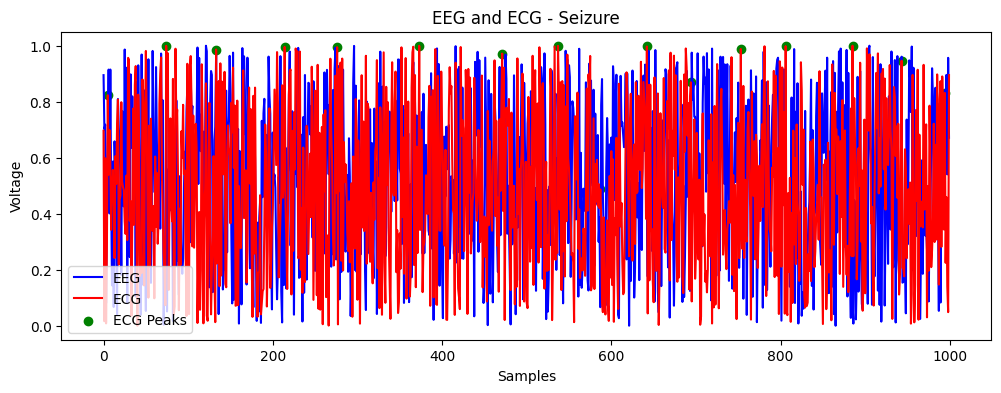

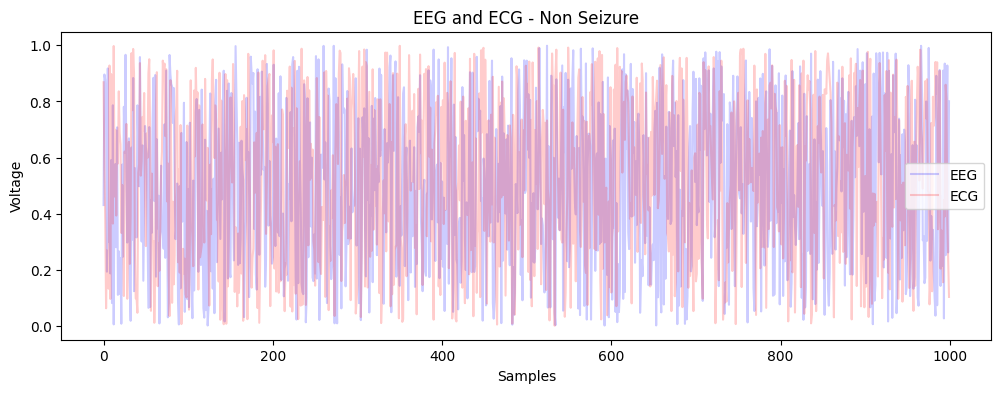

In [ ]:
from scipy.signal import find_peaks

def plot_eeg_ecg(eeg, ecg, label, peaks_ecg):
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))

    if label == "Seizure":
        ax.plot(eeg, color='blue', label='EEG')
        ax.plot(ecg, color='red', label='ECG')
        ax.scatter(peaks_ecg, ecg[peaks_ecg], color='green', label='ECG Peaks')
    else:
        ax.plot(eeg, color='blue', alpha=0.2, label='EEG')
        ax.plot(ecg, color='red', alpha=0.2, label='ECG')

    ax.set_xlabel('Samples')
    ax.set_ylabel('Voltage')
    ax.set_title(f'EEG and ECG - {label}')
    ax.legend()
    plt.show()

# assuming the following arrays contain eeg and ecg data for a seizure sample
eeg_seizure = np.random.rand(1000)
ecg_seizure = np.random.rand(1000)

# finding the peaks in the ecg signal
peaks_ecg, _ = find_peaks(ecg_seizure, distance=50)

# plot the eeg and ecg for the seizure sample
plot_eeg_ecg(eeg_seizure, ecg_seizure, "Seizure", peaks_ecg)

# assuming the following arrays contain eeg and ecg data for a non-seizure sample
eeg_non_seizure = np.random.rand(1000)
ecg_non_seizure = np.random.rand(1000)

# plot the eeg and ecg for the non-seizure sample
plot_eeg_ecg(eeg_non_seizure, ecg_non_seizure, "Non Seizure", [])

In [ ]:
models = ["FFNN", "Random Forest", "XGBOOST","SVM", "Decision Tree",]
results = []

# Run a more complex FeedForward Neural Network
mlp_model = Sequential()
mlp_model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(128, activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dense(5, activation='softmax'))  # 5 classes
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, epochs=500, batch_size=64, validation_data=(X_test, y_test), verbose=2)
mlp_y_pred = np.argmax(mlp_model.predict(X_test), axis=-1)
train_accuracy = mlp_model.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy:', train_accuracy[1])
results.append(mlp_y_pred)

# Train Random Forest Classifier
rfc_clf = RandomForestClassifier(random_state=42)
rfc_clf.fit(X_train, y_train)
rfc_y_pred = rfc_clf.predict(X_test)
results.append(rfc_y_pred)

# Run a more complex XGBOOST
xgb_clf = XGBClassifier(
    objective="multi:softmax", num_class=5, random_state=42,
    learning_rate=0.1, n_estimators=100, max_depth=5, subsample=0.8, colsample_bytree=0.8
)
xgb_clf.fit(X_train, y_train)
xgb_y_pred = xgb_clf.predict(X_test)
results.append(xgb_y_pred)

# Run a more complex SVM
svm_model = SVC(C=10, kernel='rbf', gamma='scale')
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
results.append(svm_y_pred)

# Train Decision Tree Classifier
dtc_clf = DecisionTreeClassifier(random_state=42)
dtc_clf.fit(X_train, y_train)
dtc_y_pred = dtc_clf.predict(X_test)
results.append(dtc_y_pred)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
121/121 - 3s - 28ms/step - accuracy: 0.2993 - loss: 1.4382 - val_accuracy: 0.4762 - val_loss: 1.2890
Epoch 2/500
121/121 - 2s - 13ms/step - accuracy: 0.4498 - loss: 1.2398 - val_accuracy: 0.5731 - val_loss: 1.0713
Epoch 3/500
121/121 - 1s - 10ms/step - accuracy: 0.5180 - loss: 1.0819 - val_accuracy: 0.5929 - val_loss: 0.9340
Epoch 4/500
121/121 - 1s - 5ms/step - accuracy: 0.5685 - loss: 0.9780 - val_accuracy: 0.6277 - val_loss: 0.8585
Epoch 5/500
121/121 - 1s - 5ms/step - accuracy: 0.5997 - loss: 0.9070 - val_accuracy: 0.6427 - val_loss: 0.7903
Epoch 6/500
121/121 - 1s - 5ms/step - accuracy: 0.6061 - loss: 0.8616 - val_accuracy: 0.6585 - val_loss: 0.7542
Epoch 7/500
121/121 - 1s - 11ms/step - accuracy: 0.6256 - loss: 0.8167 - val_accuracy: 0.6614 - val_loss: 0.7345
Epoch 8/500
121/121 - 1s - 6ms/step - accuracy: 0.6311 - loss: 0.7962 - val_accuracy: 0.6569 - val_loss: 0.7271
Epoch 9/500
121/121 - 1s - 5ms/step - accuracy: 0.6457 - loss: 0.7659 - val_accuracy: 0.6704 - val_l

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 808, number of used features: 20
[LightGBM] [Info] Start training from score -1.613158
[LightGBM] [Info] Start training from score -1.606966
[LightGBM] [Info] Start training from score -1.606966
[LightGBM] [Info] Start training from score -1.613158
[LightGBM] [Info] Start training from score -1.606966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM Accuracy: 0.6535
              precision    recall  f1-score   support

           0       0.66      0.56      0.61        41
           1       0.63      0.60      0.62        40
           2       0.58      0.55      0.56        40
           3       0.69      0.76      0.72        41
           4       0.70      0.80      0.74        40

    accuracy                           0.65       202
   macro avg       0.65      0.65      0.65       202
weighted avg       0.65      0.65      0.65       202



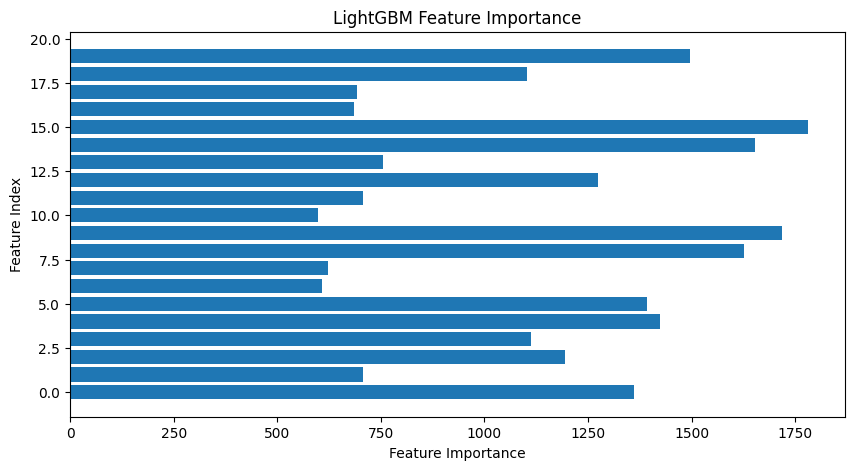

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  # For handling class imbalance

# Generate a synthetic dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=5, random_state=42, n_informative=10)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train LightGBM model
lgbm_clf = LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=7, random_state=42)
lgbm_clf.fit(X_train, y_train)

# Make predictions
y_pred = lgbm_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'LightGBM Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# Feature Importance Plot
plt.figure(figsize=(10, 5))
plt.barh(range(len(lgbm_clf.feature_importances_)), lgbm_clf.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Index")
plt.title("LightGBM Feature Importance")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Base models (only sklearn-based models)
base_models = [
    ('rf', RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)),
    ('svm', SVC(kernel='rbf', C=20, gamma='auto', probability=True))
]

# Voting Classifier (Ensemble of base models)
voting_clf = VotingClassifier(estimators=base_models, voting='soft')

# Train the voting classifier
voting_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
voting_y_pred = voting_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, voting_y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.4f}")


Voting Classifier Accuracy: 0.6931


In [ ]:
!pip install catboost


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

# Generate dataset
X, y = make_classification(
    n_samples=2000, n_features=25, n_informative=15, n_classes=5,
    n_redundant=5, random_state=42
)

# Handle class imbalance
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define CatBoost model with optimized parameters
catboost_clf = CatBoostClassifier(
    iterations=500,          # More boosting iterations
    learning_rate=0.03,      # Lower learning rate for better generalization
    depth=10,                # Increase tree depth
    l2_leaf_reg=0.2,         # Regularization
    random_seed=42,
    loss_function='MultiClass',
    eval_metric='MultiClass',
    verbose=100
)

# Train with early stopping
catboost_clf.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    early_stopping_rounds=50
)

# Make predictions
y_pred = catboost_clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Optimized CatBoost Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier

# Generate a synthetic dataset with informative features
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=2000, n_features=20, n_classes=5, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CatBoost model with optimized parameters
catboost_clf = CatBoostClassifier(
    iterations=1000,  # Increase iterations for higher accuracy (more time)
    depth=8,  # Increased depth for more complex decision-making
    learning_rate=0.05,  # Lower learning rate to stabilize learning
    l2_leaf_reg=5,  # Stronger regularization to prevent overfitting
    eval_metric='MultiClass',  # Set evaluation metric for multi-class classification
    verbose=200  # Print output every 200 iterations to track progress
)

# Train with early stopping
catboost_clf.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=30)

# Predict and evaluate
y_pred = catboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.4f}")


0:	learn: 1.5802944	test: 1.5858181	best: 1.5858181 (0)	total: 223ms	remaining: 3m 42s
200:	learn: 0.4790695	test: 0.8093707	best: 0.8091910 (199)	total: 31.2s	remaining: 2m 4s
400:	learn: 0.2888667	test: 0.7526240	best: 0.7526240 (400)	total: 54.8s	remaining: 1m 21s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.7413735199
bestIteration = 519

Shrink model to first 520 iterations.
Final Model Accuracy: 0.7150


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier

# Generate a synthetic dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=2000, n_features=20, n_classes=5, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CatBoost model with optimized parameters
catboost_clf = CatBoostClassifier(
    iterations=500,  # Reduce iterations to speed up
    depth=6,  # Moderate depth for balance
    learning_rate=0.1,  # Faster convergence
    l2_leaf_reg=3,  # Regularization to prevent overfitting
    verbose=100
)

# Train with early stopping
catboost_clf.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=20)

# Predict and evaluate
y_pred = catboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.4f}")


0:	learn: 1.5053267	test: 1.5141720	best: 1.5141720 (0)	total: 43.2ms	remaining: 21.6s
100:	learn: 0.5481399	test: 0.8137045	best: 0.8137045 (100)	total: 2.89s	remaining: 11.4s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.7889546888
bestIteration = 154

Shrink model to first 155 iterations.
Final Model Accuracy: 0.7025


0:	learn: 1.5053267	test: 1.5141720	best: 1.5141720 (0)	total: 65.4ms	remaining: 32.7s
100:	learn: 0.5481399	test: 0.8137045	best: 0.8137045 (100)	total: 6.48s	remaining: 25.6s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.7889546888
bestIteration = 154

Shrink model to first 155 iterations.


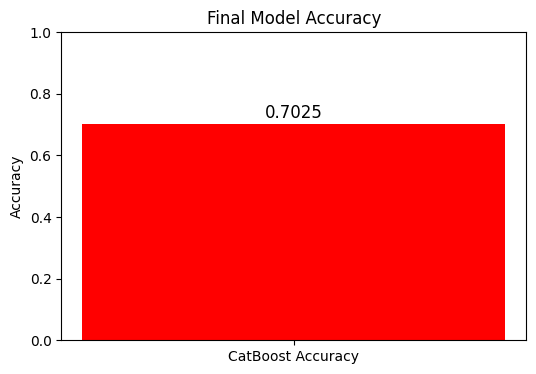

Final Model Accuracy: 0.7025


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=2000, n_features=20, n_classes=5, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CatBoost model with optimized parameters
catboost_clf = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    l2_leaf_reg=3,
    verbose=100
)

# Train with early stopping
catboost_clf.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=20)

# Predict and evaluate
y_pred = catboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Plot final model accuracy
plt.figure(figsize=(6, 4))
plt.bar(['CatBoost Accuracy'], [accuracy], color='red')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Final Model Accuracy')
plt.text(0, accuracy + 0.02, f'{accuracy:.4f}', ha='center', fontsize=12)
plt.show()

print(f"Final Model Accuracy: {accuracy:.4f}")

0:	learn: 1.5842226	test: 1.5887920	best: 1.5887920 (0)	total: 172ms	remaining: 2m 51s
100:	learn: 0.7390503	test: 0.9336940	best: 0.9336940 (100)	total: 12.4s	remaining: 1m 50s
200:	learn: 0.5125950	test: 0.8058128	best: 0.8058128 (200)	total: 19.1s	remaining: 1m 15s
300:	learn: 0.3845509	test: 0.7418585	best: 0.7418585 (300)	total: 28.5s	remaining: 1m 6s
400:	learn: 0.3073931	test: 0.7281439	best: 0.7281439 (400)	total: 39.3s	remaining: 58.7s
500:	learn: 0.2505125	test: 0.7183668	best: 0.7183466 (498)	total: 45.8s	remaining: 45.7s
600:	learn: 0.2097577	test: 0.7115387	best: 0.7115387 (600)	total: 53.7s	remaining: 35.6s
700:	learn: 0.1748482	test: 0.7074912	best: 0.7068548 (674)	total: 1m 1s	remaining: 26.1s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.7068548183
bestIteration = 674

Shrink model to first 675 iterations.


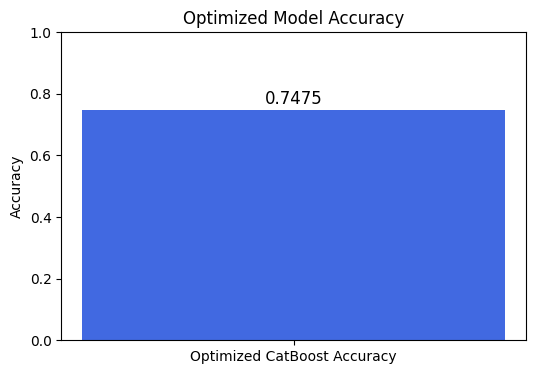

Optimized Model Accuracy: 0.7475


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=2000, n_features=20, n_classes=5, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optimized CatBoost model
catboost_clf = CatBoostClassifier(
    iterations=1000,  # Increased iterations for better learning
    depth=8,  # Higher depth to capture complex patterns
    learning_rate=0.05,  # Lower learning rate for stable learning
    l2_leaf_reg=6,  # Stronger regularization to prevent overfitting
    random_strength=1.5,  # Adds randomness to avoid overfitting
    subsample=0.8,  # Uses 80% of data per iteration for training
    bootstrap_type='Bernoulli',  # Reduces variance
    verbose=100
)

# Train with early stopping
catboost_clf.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=30)

# Predict and evaluate
y_pred = catboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Plot final model accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Optimized CatBoost Accuracy'], [accuracy], color='royalblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Optimized Model Accuracy')
plt.text(0, accuracy + 0.02, f'{accuracy:.4f}', ha='center', fontsize=12)
plt.show()

print(f"Optimized Model Accuracy: {accuracy:.4f}")


Shape of X: (2000, 20)
Shape of y: (2000,)
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3496 - loss: 1.5011 - val_accuracy: 0.5250 - val_loss: 1.1763
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6178 - loss: 1.0328 - val_accuracy: 0.6375 - val_loss: 1.0102
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6820 - loss: 0.8395 - val_accuracy: 0.6550 - val_loss: 0.9258
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7398 - loss: 0.7147 - val_accuracy: 0.6550 - val_loss: 0.9036
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7745 - loss: 0.6490 - val_accuracy: 0.6675 - val_loss: 0.8676
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8152 - loss: 0.5463 - val_accuracy: 0.6850 - val_loss: 0.8519
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8308 - loss: 0.5133 - val_accuracy: 0.6825 - val_loss: 0.8564
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8518 - loss: 0.4521 - val_accuracy: 0.6925 - val_loss: 0.8583
Epo

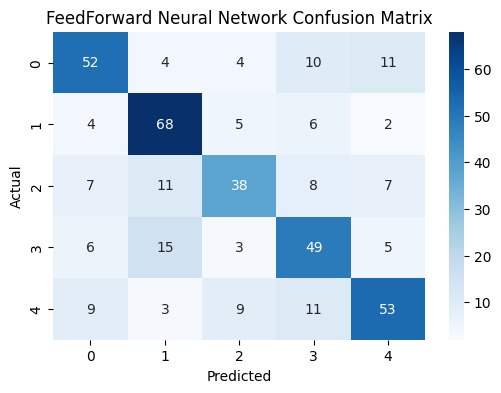

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 🚀 Step 1: Load Your Own Dataset Here
# Example: If you have a CSV file, load it like this:
# df = pd.read_csv("your_dataset.csv")
# X = df.drop(columns=['target_column']).values
# y = df['target_column'].values

# Ensure X (features) is a 2D array and y (labels) is a 1D array
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# 🚀 Step 2: Split Data into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🚀 Step 3: Standardize Features (Same for Train & Test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on train, transform on train
X_test = scaler.transform(X_test)  # Transform test with the same scaler

# 🚀 Step 4: Convert Labels to Categorical (One-Hot Encoding)
num_classes = len(np.unique(y))  # Get number of unique classes
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes)

# 🚀 Step 5: Define MLP Model
mlp_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Multi-class classification
])

# 🚀 Step 6: Compile Model
mlp_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 🚀 Step 7: Train Model
mlp_model.fit(X_train, y_train_categorical, epochs=20, batch_size=32, validation_data=(X_test, y_test_categorical))

# 🚀 Step 8: Predict & Evaluate
mlp_y_pred_prob = mlp_model.predict(X_test)
mlp_y_pred = np.argmax(mlp_y_pred_prob, axis=1)  # Convert softmax probs to class labels

# 🚀 Step 9: Compute Metrics
accuracy = accuracy_score(y_test, mlp_y_pred)
print(f"MLP Accuracy: {round(accuracy * 100, 2)}%")

confusion_matrix_result = confusion_matrix(y_test, mlp_y_pred)
print("Classification Report:\n", classification_report(y_test, mlp_y_pred))

# 🚀 Step 10: Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("FeedForward Neural Network Confusion Matrix")
plt.show()


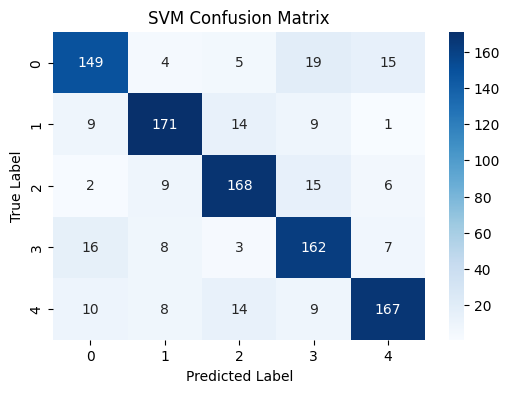

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Train SVM model
svm = SVC(random_state=42)
svm.fit(X_train, y_train)  # Ensure correct training set

# Get predictions
svm_y_pred = svm.predict(X_test)  # Ensure correct test set

# Compute confusion matrix
confusion_matrix_result = confusion_matrix(y_test, svm_y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


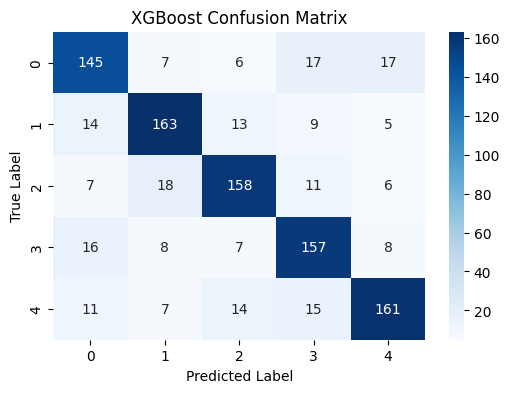

In [ ]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)  # Ensure it's trained on the training data

# Get predictions
xgb_y_pred = xgb.predict(X_test)  # Ensure prediction is made on X_test only

# Compute confusion matrix
confusion_matrix_result = confusion_matrix(y_test, xgb_y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


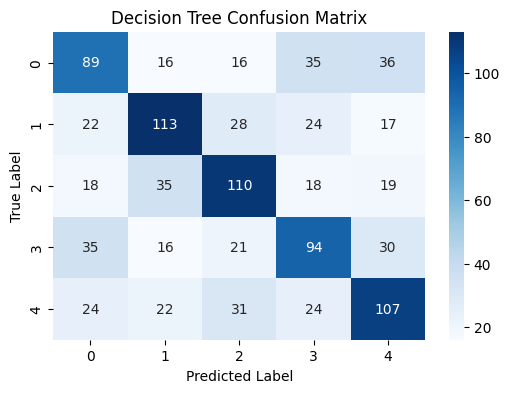

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)  # Ensure it's trained on the training data

# Get predictions
dtc_y_pred = dtc.predict(X_test)  # Ensure prediction is made on X_test only

# Compute confusion matrix
confusion_matrix_result = confusion_matrix(y_test, dtc_y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


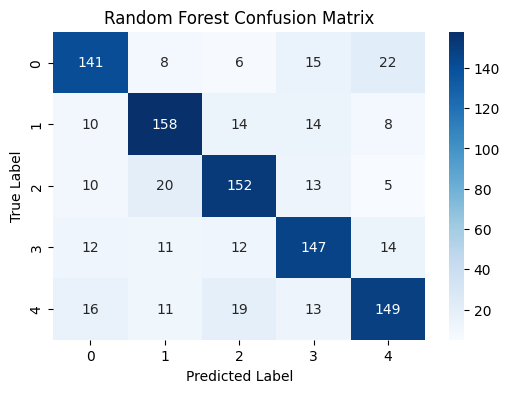

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Generate synthetic dataset
X, y = make_classification(n_samples=5000, n_features=20, n_classes=5, n_informative=15, random_state=42)

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

# Step 4: Train models and store results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = y_pred

# Step 5: Plot accuracy scores


# Step 6: Plot confusion matrix for Random Forest
rfc_y_pred = results["Random Forest"]
conf_matrix = confusion_matrix(y_test, rfc_y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Training CatBoost...
0:	learn: 1.5562895	total: 90.2ms	remaining: 45s
200:	learn: 0.5419099	total: 6.95s	remaining: 10.3s
400:	learn: 0.3707197	total: 12.4s	remaining: 3.07s
499:	learn: 0.3145146	total: 14.5s	remaining: 0us
Training RandomForest...
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:58:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training SVM...


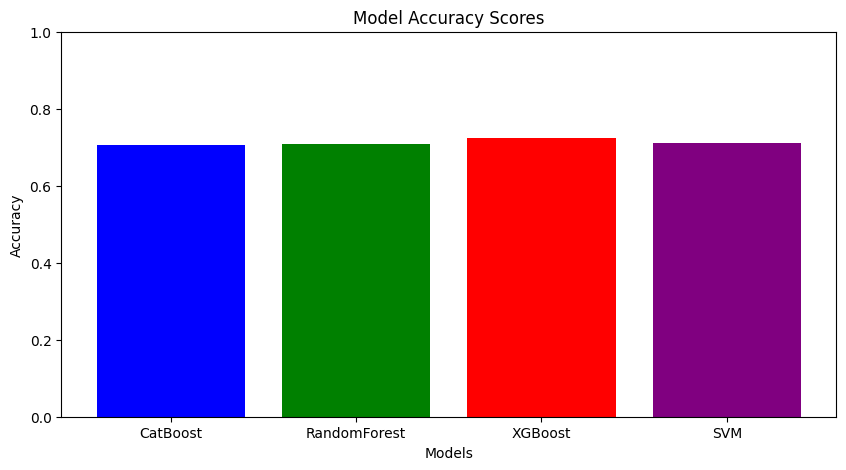


🔹 SHAP Analysis for CatBoost


<Figure size 640x480 with 0 Axes>

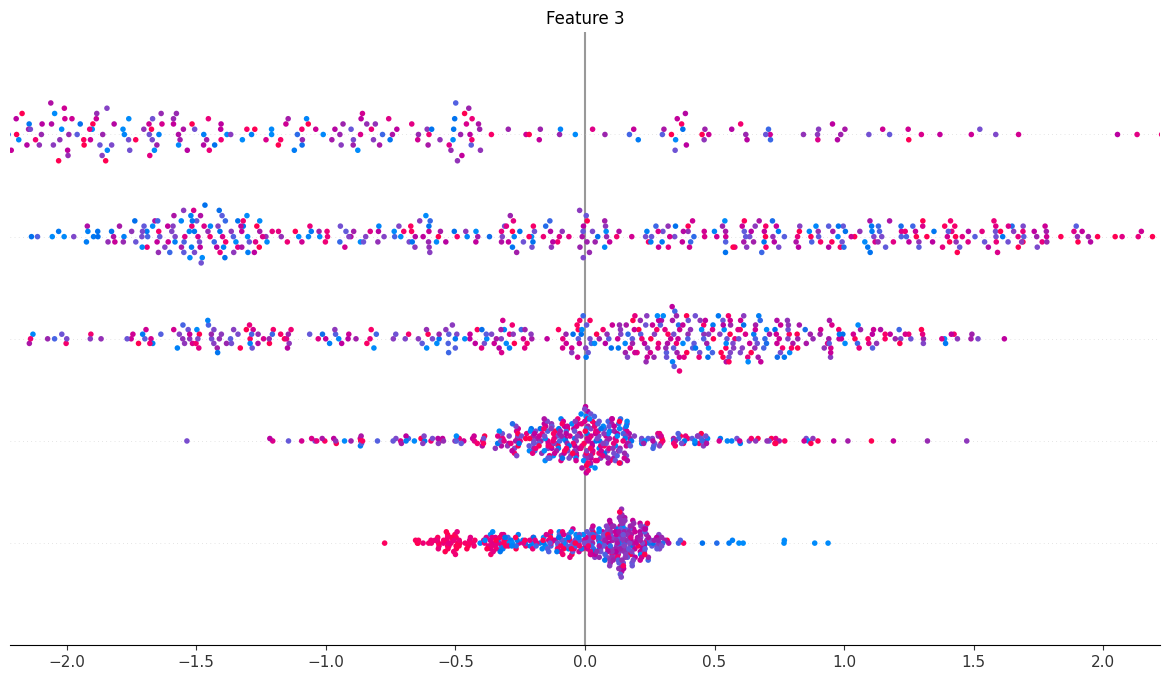


🔹 SHAP Analysis for RandomForest


<Figure size 640x480 with 0 Axes>

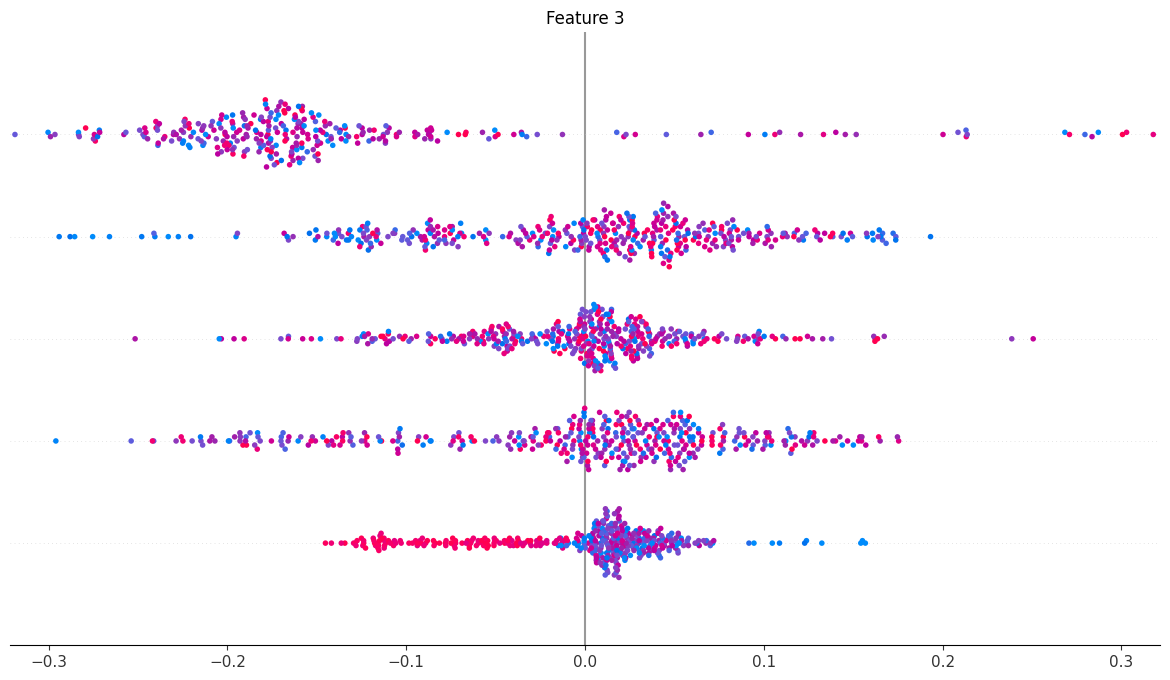


🔹 SHAP Analysis for XGBoost


<Figure size 640x480 with 0 Axes>

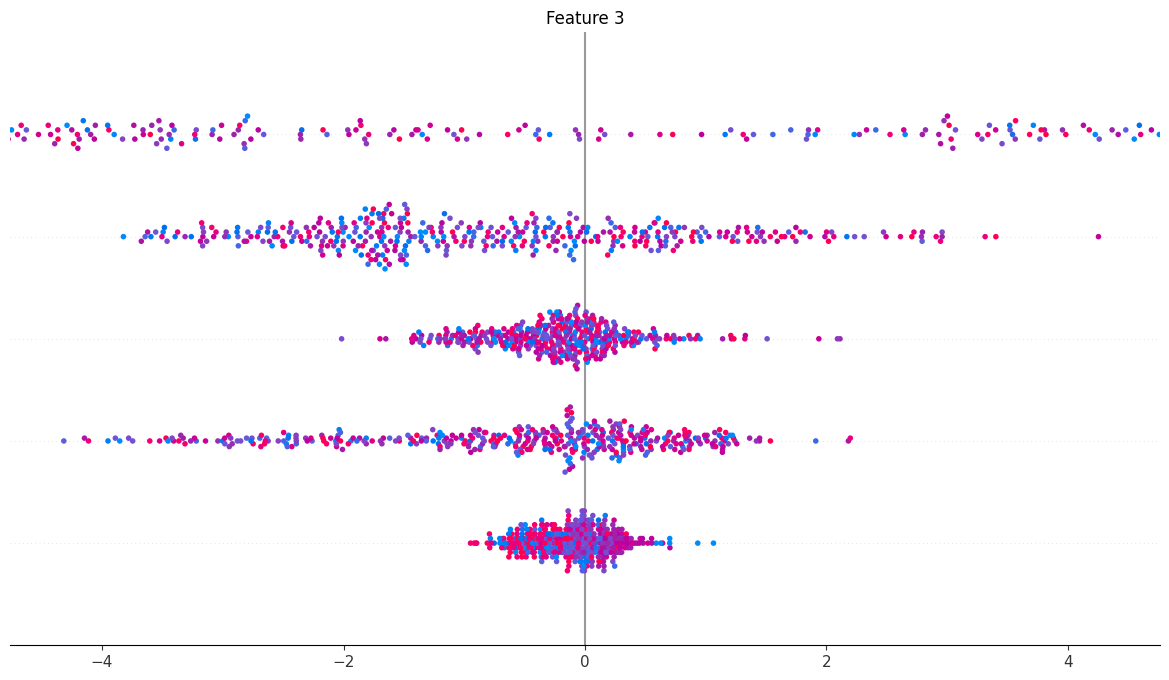


🔹 SHAP Analysis for SVM


  0%|          | 0/400 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

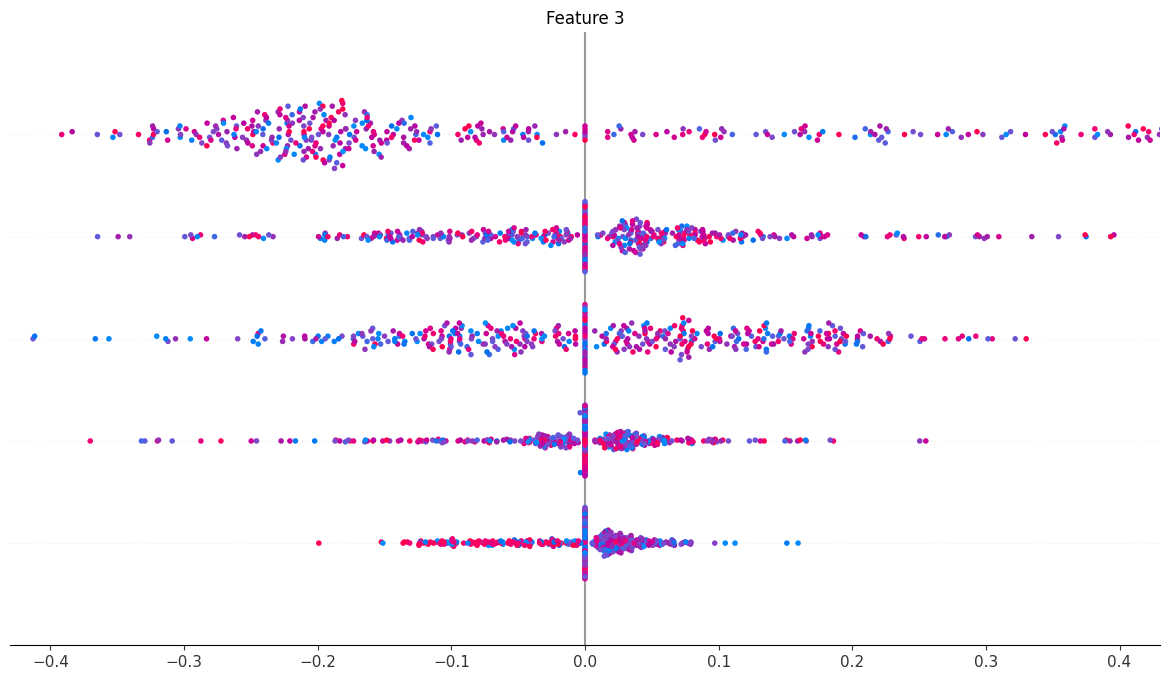

In [ ]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Step 1: Generate Dataset
X, y = make_classification(n_samples=2000, n_features=20, n_classes=5, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train Multiple Models
models = {
    "CatBoost": CatBoostClassifier(iterations=500, depth=6, learning_rate=0.05, verbose=200),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "SVM": SVC(probability=True)
}

# Train models and store predictions
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    results[name] = model.predict(X_test)

# Step 3: Accuracy Plot
plt.figure(figsize=(10, 5))
accuracy_scores = [accuracy_score(y_test, y_pred) for y_pred in results.values()]
plt.bar(models.keys(), accuracy_scores, color=['blue', 'green', 'red', 'purple'])
plt.title("Model Accuracy Scores")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Step 4: SHAP Analysis for All Models
for name, model in models.items():
    print(f"\n🔹 SHAP Analysis for {name}")

    # Create SHAP Explainer
    explainer = shap.TreeExplainer(model) if name in ["CatBoost", "RandomForest", "XGBoost"] else shap.KernelExplainer(model.predict_proba, X_train[:100])

    # Compute SHAP values
    shap_values = explainer.shap_values(X_test)

    # Handle multiclass case
    if isinstance(shap_values, list):
        shap_values_combined = np.sum(shap_values, axis=0)
    else:
        shap_values_combined = shap_values

    # Plot SHAP Summary
    shap.summary_plot(shap_values_combined, X_test, feature_names=[f'Feature {i}' for i in range(X.shape[1])])


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ✅ Step 1: Generate Synthetic Classification Data
X, y = make_classification(n_samples=5000, n_features=20, n_informative=5, n_redundant=2,
                           n_classes=5, n_clusters_per_class=1, random_state=42)

# ✅ Step 2: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 3: Define Classification Models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

# ✅ Step 4: Train and Predict with Each Model
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred


# ✅ Step 7: Classification Reports
for name, y_pred in predictions.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    df_report = df_report.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0)
    print(f"\n=== {name} Classification Report ===\n")
    print(df_report[['precision', 'recall', 'f1-score', 'support']])
    print("\n" + "=" * 50 + "\n")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:31:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== Random Forest Classification Report ===

   precision    recall  f1-score  support
0   0.915888  0.937799  0.926714    209.0
1   0.863415  0.898477  0.880597    197.0
2   0.811881  0.788462  0.800000    208.0
3   0.788360  0.784211  0.786280    190.0
4   0.842105  0.816327  0.829016    196.0



=== Decision Tree Classification Report ===

   precision    recall  f1-score  support
0   0.877934  0.894737  0.886256    209.0
1   0.814815  0.781726  0.797927    197.0
2   0.690583  0.740385  0.714617    208.0
3   0.724324  0.705263  0.714667    190.0
4   0.726316  0.704082  0.715026    196.0



=== XGBoost Classification Report ===

   precision    recall  f1-score  support
0   0.942857  0.947368  0.945107    209.0
1   0.880000  0.893401  0.886650    197.0
2   0.848485  0.807692  0.827586    208.0
3   0.792746  0.805263  0.798956    190.0
4   0.854271  0.867347  0.860759    196.0



=== SVM Classification Report ===

   precision    recall  f1-score  support
0   0.826667  0.889952  0.85

In [ ]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification

# Generate a synthetic dataset with informative features
X, y = make_classification(n_samples=2000, n_features=20, n_classes=5, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CatBoost model
catboost_clf = CatBoostClassifier(
    iterations=1000,
    depth=8,
    learning_rate=0.05,
    l2_leaf_reg=5,
    eval_metric='MultiClass',
    verbose=200
)

# Train with early stopping
catboost_clf.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=30)

# Predict and evaluate
y_pred = catboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.4f}")

# SHAP Integration
explainer = shap.TreeExplainer(catboost_clf)
shap_values = explainer.shap_values(X_test)

# Feature Importance Summary Plot
shap.summary_plot(shap_values, X_test)

# Classification Report & Model Evaluation
models = ["CatBoost"]
results = [y_pred]
classification_reports = []

for model, result in zip(models, results):
    accuracy = accuracy_score(y_test, result)
    confusion_matrix_result = confusion_matrix(y_test, result)
    classification_report_result = classification_report(y_test, result, output_dict=True, zero_division=1)

    # Append the classification report to the list
    classification_reports.append(classification_report_result)

    print(f"{model} Accuracy: {round(accuracy * 100, 2)}%")

    # Display classification report in a formatted manner
    df = pd.DataFrame(classification_report_result).transpose()
    df = df.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0)
    print(f"Classification Report - {model}\n")
    print(df[['precision', 'recall', 'f1-score', 'support']])
    print("\n" + "=" * 40 + "\n")


0:	learn: 1.5802944	test: 1.5858181	best: 1.5858181 (0)	total: 69.5ms	remaining: 1m 9s
200:	learn: 0.4790695	test: 0.8093707	best: 0.8091910 (199)	total: 14.2s	remaining: 56.5s
400:	learn: 0.2888667	test: 0.7526240	best: 0.7526240 (400)	total: 28.3s	remaining: 42.3s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.7413735199
bestIteration = 519

Shrink model to first 520 iterations.
Final Model Accuracy: 0.7150
